# **Линейная Регрессия**

## **Предобработка Данных**

В предыдущем модуле мы сделали предобработку данных о квартирах, выставленных на продажу
- Предобработку будем делать совместно с разведовательным анализом данных
- Найдем пропуски в данных и удалим рядя с пропусками
- Преобразуем целевую переменную
- Попробуем найти слишком коррелированые признаки
- Данные готовы для построения регрессионной модели
- Попробуем предсказать цену на квартиры с помощью линейных моделей

### **Импортируем библиотеки**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### **Читаем данные**

- Подгрузим данные и постмотрим на первые строки

In [8]:
# Подгрузим файл и посмотрим на его пкрвые строки
data = pd.read_csv('data_flats.csv',sep=';')

### **Общая информация**

Используем метод <code>info</code>

- Также обязательно запрашиваем список переменных с их типами
- Заодно посмотрим сколько у нас пропусков в данных

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30469 non-null  int64  
 1   full_sq                                30469 non-null  int64  
 2   life_sq                                24086 non-null  float64
 3   floor                                  30302 non-null  float64
 4   preschool_education_centers_raion      30469 non-null  int64  
 5   school_education_centers_raion         30469 non-null  int64  
 6   school_education_centers_top_20_raion  30469 non-null  int64  
 7   university_top_20_raion                30469 non-null  int64  
 8   sport_objects_raion                    30469 non-null  int64  
 9   additional_education_raion             30469 non-null  int64  
 10  culture_objects_top_25_raion           30469 non-null  int64  
 11  sh

- У нас 20 признаков, один из них `id` (не имеет смысловой нагрузки)
- Один из признаков, наша независимая переменная `price_doc` (цена квартиры которую будем предсказывать)
- Сразу можно еще отметить наличие пропусков в нескольких столбцов, и 30469 рядов

### **Визуализация пропусков**

- Один из признаков, наша независимая переменная `price_doc` (цена квартиры), которую мы будем предсказывать
- Точно видем что есть пропуски, так как количество наблюдении разное у разных переменных

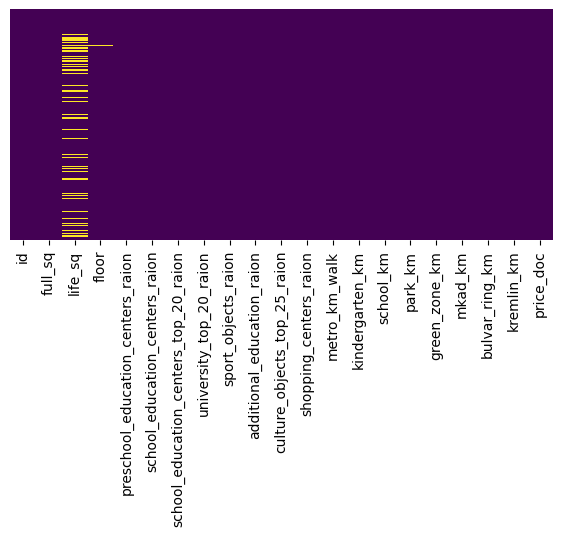

In [11]:
# data.isnull().sum()
import seaborn as sns

fix,ax = plt.subplots(figsize=(7,3))
sns_heatmap = sns.heatmap(data.isnull(),
                          yticklabels=False,
                          cbar=False,cmap='viridis')

- **Фиолетовым** показаны заполненные ячейки,**желтые** пропущенные значения
- У нас пропуски по сути только в одном признаке; `life_sq` (площадь жилой площади),
- Не будем использовать ее в модели так как доля не маленькая

### **Оценим распределение целевой переменной**
Посмотрим на распределение нашей целевой переменной, что бы понять какие значения мы будем предсказывать

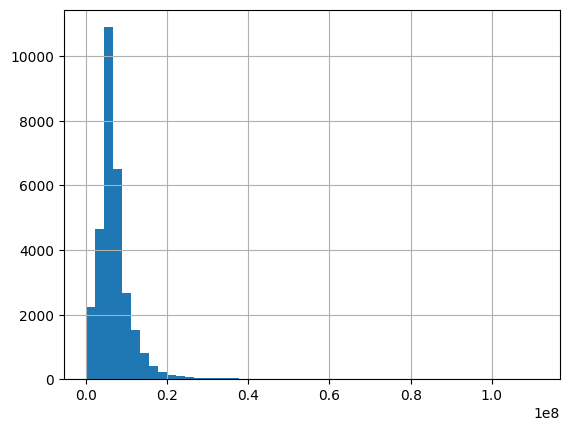

In [12]:
data.price_doc.hist(bins=50)
plt.show()

### **Преобразование целевой перемены**

- У нашего распределения есть проблемма; слишком сильный перепад
- Много квартир в среднем сегменте, но не очень много дорогих квартир
- Применим часто используюемую предобработку; логарифмическая преоброжение
- Это делаеися для того чтобы уменьшить перепад и сгладить хвостовые данные

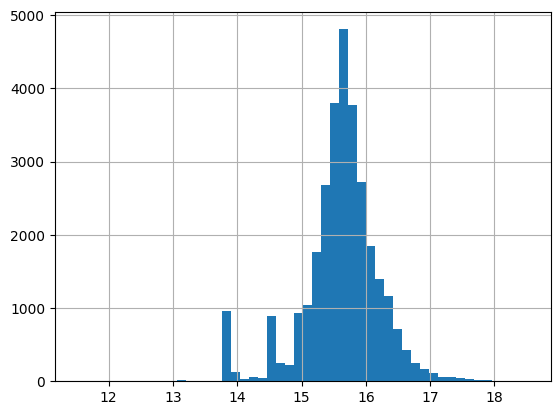

In [13]:
data['price_doc'] = data['price_doc'].apply(lambda x: np.log(x+1))
data['price_doc'].hist(bins=50)
plt.show()

### **Матрица корреляции признаков**

- Дальше будем отбирать признаки
- Нужно проверить, есть ли **мультиколлинеарности** (сильной взаимосвязи между независимыми признаками) в данных
- Посмотрим на матрицу корреляции для наших признаков

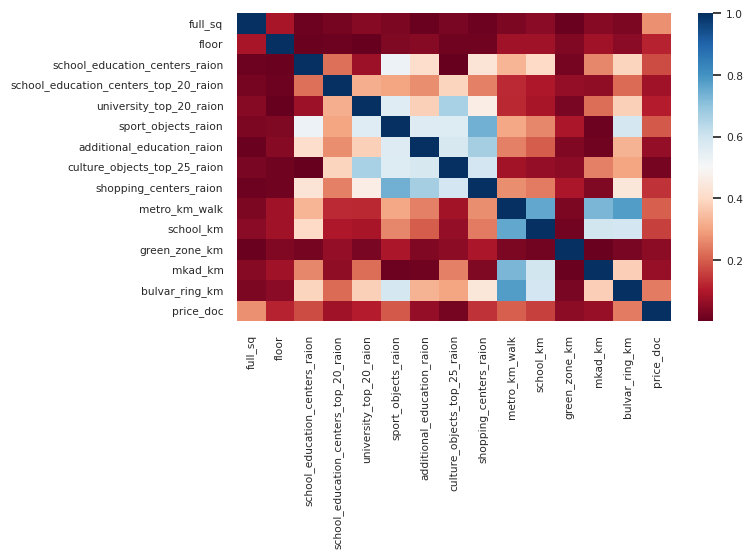

In [50]:
plt.subplots(figsize=(7,4))
sns.heatmap(np.abs(data.corr()),
            square=False,annot=False,
            fmt=".1f",cmap='RdBu')
plt.show()

Признаки у которых сильная взаимосвязь:

- Количество школ и количество детских садов `preschool_education_centres_raion` `school_education_centres_raion` (оставляем `school_education_centres_raion`)
- Расстояние до школ и расстояния до детских садов `kindergarten_km` `school_km` (оставляем `school_km`)
- Расстояния до парка и до метро `park_km` `metro_km_walk` (оставляем `metro_km_walk`)
- Расстояния до кремля и до бульварного когьца `bulvar_ring_km` `kremlin_km` (оставляем `bulvar_ring_km`)

### **Итог Предобработки**

- Нам надо убрать пять признаков (четыре из-за мультиколлинеарности и жилую площадь, так как там много пропусков), остальные оставляем.
- Теперь наши данные готовы к построению регрессионной модели.

In [37]:
# Признаки которые мы будем убирать
drop_columns = ['preschool_education_centers_raion',
                'kindergarten_km','park_km','kremlin_km',
                'life_sq','id']

data.drop(drop_columns,axis=1,inplace=True)
data = data.dropna()



## **Задание**

### **Задание 3.5.1**

- Удалите строки, где есть хотя бы один пропуск.
- Обучите линейную регрессию, взяв тестовую выборку размера 0.2, random_state=77
- Нормализуйте отобранные признаки для тестовой и для обучающей выборки отдельно(!) с помощью функции RobustScaler() (функция, которая подобна известным вам методам нормализации, однако использует медианы и квантили для вычисления, поэтому не чувствительна к выбросам и может приводить к лучшим результатам)
- Вычислите MSE , ответ запишите с точностью до сотых. Не забудьте, что id не несет никакой содержательной информации, поэтому не надо брать его в качестве предиктора! Также не забудьте, что мы логарифмировали зависимую переменную, а значит при подсчете MSE необходимо найти экспоненциальную функцию от y!

In [53]:
# Средняя цена квартиры 7.1 мил
np.exp(data['price_doc']).mean()

7129447.3451134525

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE

def evaluate(target):

    # Определим целевую и не целевую переменную
    y = data[target].copy()
    X = data.drop([target],axis=1)

    # Разбиваем выборку на тренированную и тестовую выборку
    X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                        random_state=77,
                                                        test_size=0.2)

    # Нормализуем признаки для тестовой и обучающей выборки отдельно
    scaler = RobustScaler()
    X_train_sca = scaler.fit_transform(X_train)
    X_test_sca = scaler.transform(X_test)

    # Тренируем модель
    model = LinearRegression()
    model.fit(X_train_sca,y_train)
    y_pred_test = model.predict(X_test_sca)

    # Вычисляем MSE (незабываем учитывать трансформацию)
    error_mse = np.round(MSE(np.exp(y_test) - 1,
                             np.exp(y_pred_test) - 1))
    print(f'RMSE: {round(np.sqrt(error_mse),1)}')

evaluate('price_doc')

RMSE: 4101058.9
